<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/desnoising_autoencoder_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

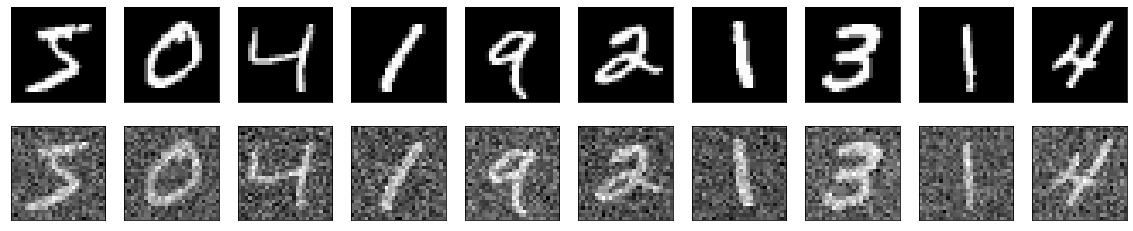

In [28]:
# load images and add noise to images: 1) Gaussian noise, 2) slat and pepper noise, 3)Speckle noise
(xtrain, _), (xtest, _) = load_data()
xtrain = xtrain.astype('float32')/255.
xtest = xtest.astype('float32')/255.

def noising(image, noise_type):
  row, col, ch = image.shape
  if noise_type == 'gauss':
    mean = 0
    var = 0.5
    sigma = var**2
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss
    return noisy
  elif noise_type == 'speckle':
    gauss = np.random.randn(row, col, ch)
    noisy = image + image * gauss
    return noisy

xtrain_noisy = noising(xtrain, 'gauss')
xtest_noisy = noising(xtest, 'gauss')

n = 10 # images to display
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(xtrain[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display noisy
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(xtrain_noisy[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

xtrain = xtrain.reshape(len(xtrain), 784)
xtest = xtest.reshape(len(xtest), 784)
xtrain_noisy = xtrain_noisy.reshape(len(xtrain_noisy), 784)
xtest_noisy = xtest_noisy.reshape(len(xtest_noisy), 784)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer3 (Dense)               (None, 128)               8320      
_________________________________________________________________
layer4 (Dense)               (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


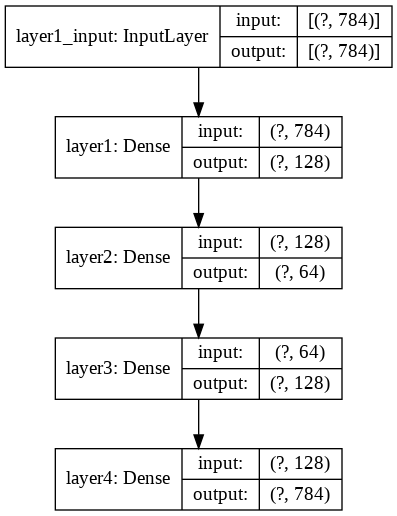

In [25]:
#autoencoder as a denoising
autoencoder = Sequential()
autoencoder.add(Dense(units=128, activation='relu'   , input_dim=784, name='layer1'))
autoencoder.add(Dense(units= 64, activation='relu'   , input_dim=128, name='layer2'))
autoencoder.add(Dense(units=128, activation='relu'   , input_dim=128, name='layer3'))
autoencoder.add(Dense(units=784, activation='sigmoid', input_dim=128, name='layer4'))

#input_img = Input(shape=(28*28,))

#autoencoder.add([layer1, layer2, layer3, layer4])
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

autoencoder.summary()
plot_model(autoencoder, to_file='denoising_ae.png', show_shapes=True, show_layer_names=True)

In [29]:
history = autoencoder.fit(x = xtrain_noisy, y= xtrain, epochs=10, batch_size=32, shuffle=True,\
                    validation_data=(xtrain, xtrain), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0252 - accuracy: 0.0111 - val_loss: 0.0123 - val_accuracy: 0.0141
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0130 - accuracy: 0.0116 - val_loss: 0.0091 - val_accuracy: 0.0112
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0112 - accuracy: 0.0123 - val_loss: 0.0077 - val_accuracy: 0.0130
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0103 - accuracy: 0.0128 - val_loss: 0.0071 - val_accuracy: 0.0153
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0099 - accuracy: 0.0125 - val_loss: 0.0068 - val_accuracy: 0.0128
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0095 - accuracy: 0.0135 - val_loss: 0.0066 - val_accuracy: 0.0112
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0093 - accuracy: 0.0138 - val_loss: 0.0063 - val_accuracy

<Figure size 432x288 with 0 Axes>

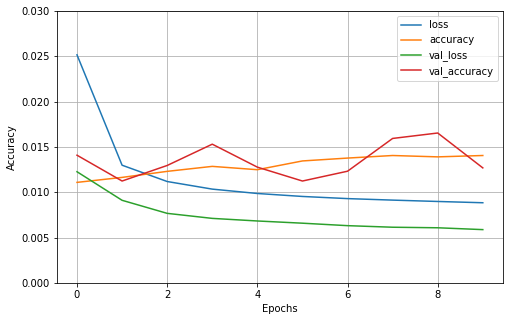

In [30]:
import pandas as pd

plt.figure()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.03)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

313/313 [==============================] - 0s 1ms/step


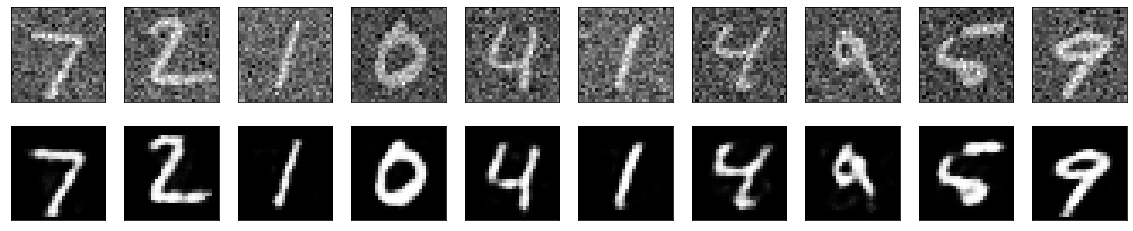

In [32]:
predicted_imgs = autoencoder.predict(xtest_noisy, verbose=1)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()